# Predicting heart disease

This notebook looks into develop a ML model that is able to predict wheather a patient has heart disease based on medical parameters. To build a model it will be used Python-based ML and Data Science libraries.

**Steps used to build the model:**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### **1. Problem definition**
> It is possible to predict if a patient has heart disease based on medical parameters?

### **2. Data**
The original data came from the UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease

Other version is available on Kaggle: 
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

### **3. Evaluation**
> If the accuracy can reach 95%, move forward with the project.

### **4. Features**
Gather informations about the dataset and each feature found in the data. Informations can be obtained through doing research about the dataset (from the links above) or asking someone who knows (an expert) about the dataset.

**Data dictionary:**

1. **age** - age in years
2. **sex** - (1=male; 0=female)
3. **cp** - chest pain type
    * **0:** Typical angina: chest pain related decrease blood supply to the heart
    * **1:** Atypical angina: chest pain not related to heart
    * **2:** Non-anginal pain: typically esophageal spasms (non heart related)
    * **3:** Asymptomatic: chest pain not showing signs of disease
4. **trestbps** - resting blood pressure (in mmHg on admission to the hospital) anything above 130-140 is typically cause for concern
5. **chol** - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. **fbs** - fasting blood sugar > 120 mg/dl (1=true; 0=false)
    * '>126' mg/dL signals diabetes
7. **restecg** - resting electrocardiographic results
    * **0:** Nothing to note
    * **1:** ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * **2:** Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. **thalach** - maximum heart rate achieved
9. **exang** - exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. **slope** - the slope of the peak exercise ST segment
    * **0:** Upsloping: better heart rate with excercise (uncommon)
    * **1:** Flatsloping: minimal change (typical healthy heart)
    * **2:** Downslopins: signs of unhealthy heart
12. **ca** - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. **thal** - thalium stress result
    * **1,3:** normal
    * **6:** fixed defect: used to be defect but ok now
    * **7:** reversable defect: no proper blood movement when excercising
14. **target** - have disease or not (1=yes, 0=no) (=the predicted attribute)

### **Import all the libraries and tools**
- NumPy, Matplotlib, and Pandas will be used for data analysis and manipulation.
- The problem is a classification problem, so are going to be used classification models/algorithms from sklearn's modules.
- For evaluations are going to be used evaluations metrics from sklearn's modules.

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Helps plots to be shown in Jupyter Notebook
%matplotlib inline

# Models/algorithms from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Evaluations metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

### **Import data**

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.shape # (rows, columns)

(303, 14)

### **Data Exploration (EDA)**
Get informations and find out more about the data.

1. Problem definition
2. Categorical vs. numerical features
3. Missing data
4. Outliers
5. Add, change or remove features to get more out of your data data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# How many of each class are there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

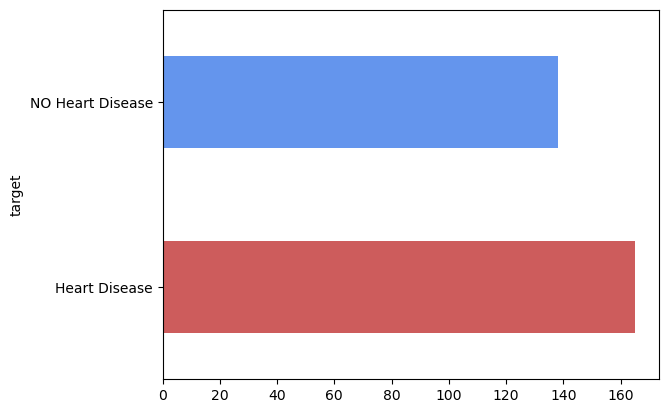

In [7]:
df['target'].value_counts().plot.barh(color=['IndianRed', 'CornflowerBlue'])
plt.yticks([0, 1], ['Heart Disease', 'NO Heart Disease']);

In [8]:
# Get info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Check if there are missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### **Heart Disease frequency according to `sex`**
* 1 = male
* 0 = female

In [12]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# Compare target column with sex column
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


According to the crosstab, there are:
* 24 females and 114 males with NO heart disease
* 72 females and 93 males with heart disease

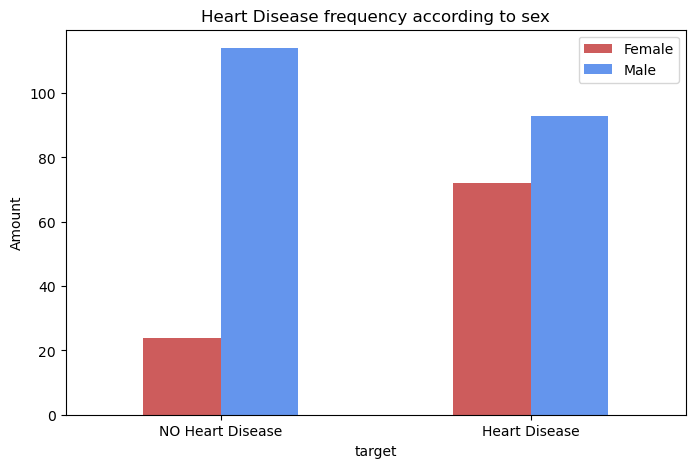

In [16]:
# Create a plot of crosstab
pd.crosstab(df['target'], df['sex']).plot(kind='bar',
                                          figsize=(8, 5),
                                          color=['IndianRed', 'CornflowerBlue']);

plt.title('Heart Disease frequency according to sex')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks([0, 1], ['NO Heart Disease', 'Heart Disease'], rotation=0);

### **Age vs. Max Heart Rate (thalach)**

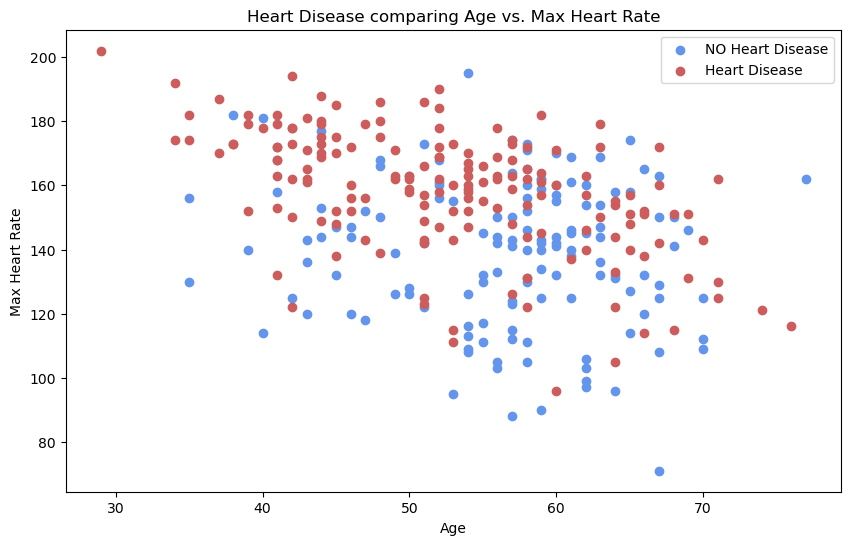

In [18]:
plt.figure(figsize=(10, 6))

# Scatter with NO heart disease (target=0)
plt.scatter(df.age[df['target']==0],
            df.thalach[df['target']==0],
            c='CornflowerBlue');

# Scatter with heart disease (target=1)
plt.scatter(df.age[df['target']==1],
            df.thalach[df['target']==1],
            c='IndianRed');

# Add some informations about the plot
plt.title('Heart Disease comparing Age vs. Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['NO Heart Disease', 'Heart Disease']);

### **Distribution of `age` column**

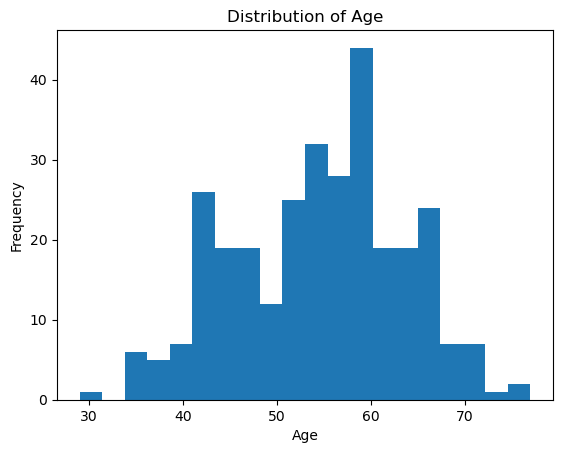

In [19]:
df['age'].plot.hist(bins=20);

plt.title('Distribution of Age')
plt.xlabel('Age');

### **Heart Disease frequency according to `cp` (chest pain type)**

**cp** - chest pain type
* **0:** Typical angina: chest pain related decrease blood supply to the heart
* **1:** Atypical angina: chest pain not related to heart
* **2:** Non-anginal pain: typically esophageal spasms (non heart related)
* **3:** Asymptomatic: chest pain not showing signs of disease

In [20]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


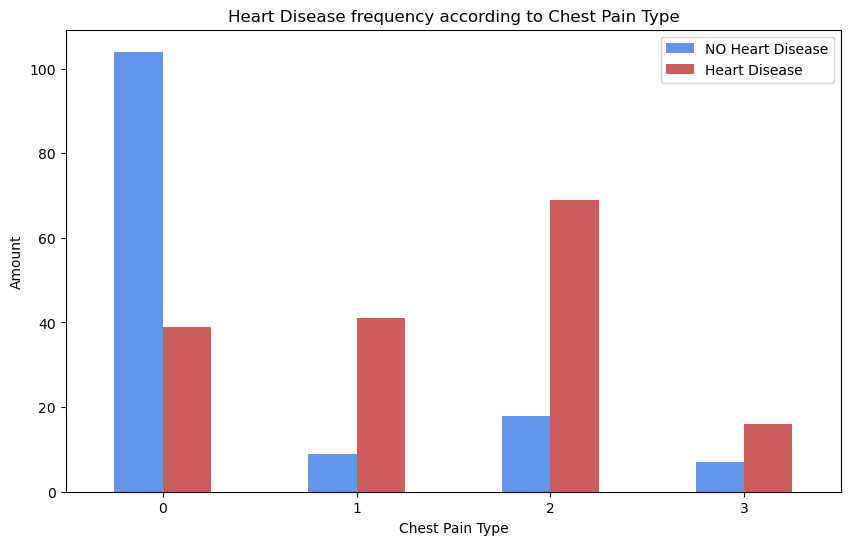

In [21]:
pd.crosstab(df['cp'], df['target']).plot.bar(figsize=(10, 6),
                                             color=['CornflowerBlue', 'IndianRed'])

# Add some informations about the plot
plt.title('Heart Disease frequency according to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['NO Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0);

### **Correlation matrix**

In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


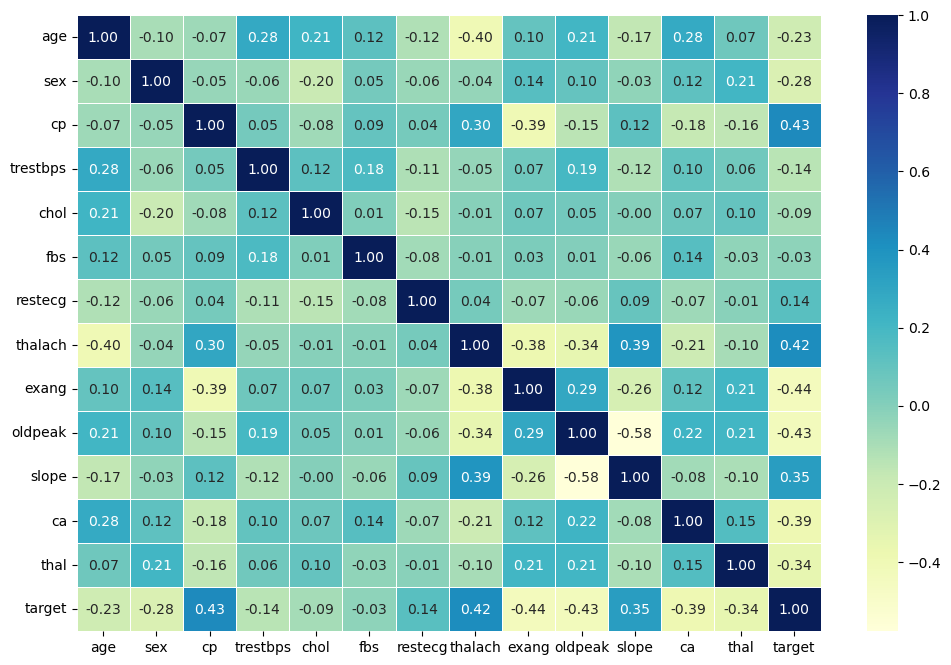

In [26]:
# Correlation matrix displyed with Seaborn
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(df.corr(),
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');

### **5. Modelling**

In [27]:
# Review the data
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [28]:
# Split data into X & y
X = df.drop('target', axis=1)
y = df['target']

In [29]:
# Initiate a random seed to visualize better a potential increase of the evaluation
np.random.seed(56)

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3


In [31]:
y_train

78     1
246    0
298    0
239    0
197    0
      ..
233    0
142    1
122    1
235    0
192    0
Name: target, Length: 242, dtype: int64

After splitting the data into train & test sets, next is to build a ML model. The model will be trained (find patterns) on the training set and it will be test it on the test set.

For the building of the model it will be used 3 different ML models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest ClassifierClassifier

In [32]:
# Store in a dictionary all models/algorithms that are going to be used
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given ML models.
    models: dictionary of different Scikit-Learn machine learning models;
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    '''
    # Set random seed
    np.random.seed(56)
    
    # Make a dictionary with models score
    models_score = {}

    # Loop through models
    for name, clf in models.items():
        clf.fit(X_train, y_train) # Fit the model to the data
        models_score[name] = clf.score(X_test, y_test) # Evaluate the model and add its score to models_score
    
    return models_score

In [33]:
models_score = fit_and_score(models, X_train, X_test, y_train, y_test)
models_score

E:\ML\Heart-Disease-ML-Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8032786885245902}

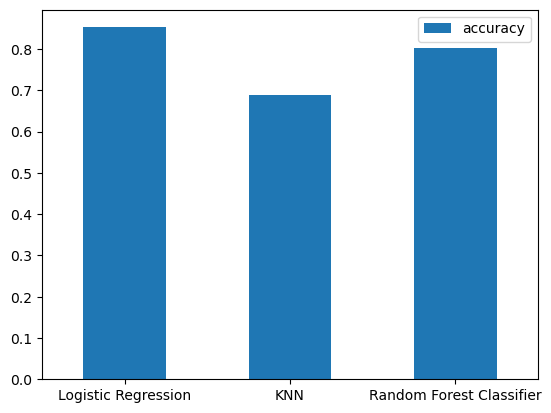

In [34]:
df_models_comparison = pd.DataFrame(models_score, index=['accuracy'])
df_models_comparison.T.plot(kind='bar')
plt.xticks(rotation=0);

According to the baseline model, `KNN` has the lowest score and `Logistic Regression` has the highest score.

Next steps of the problem are:
1. Tuning hyperparameters
2. ROC curve and AUC (area under the curve)
3. Confusion matrix
4. Evaluation metrics
    * Classification report
    * Accuracy
    * Precision
    * Recall
    * F1 score

### **5.1. Tuning Hyperameters**

#### 5.1.1. By hand

KNN model has the lowest baseline score. Let's see if it can be improved (tuned by hand) through changing one of the parameters (`n_neighbors`).

In [35]:
# Initialize some lists for train and test scores
train_scores = []
test_scores = []

# Create a list of different values for `n_neighbors`
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different values of `n_neighbors`
for i in neighbors:
    # Setup parameter
    knn.set_params(n_neighbors=i)

    # Fit the model
    knn.fit(X_train, y_train)

    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update test scores list
    test_scores.append(knn.score(X_test, y_test))

In [36]:
df_knn_scores = pd.DataFrame({'Train Scores': train_scores, 
                              'Test Scores': test_scores})
df_knn_scores

,Train Scores,Test Scores
0,1.000000,0.655738
1,0.805785,0.639344
2,0.764463,0.688525
3,0.752066,0.639344
4,0.764463,0.688525
5,0.752066,0.688525
6,0.752066,0.655738
7,0.719008,0.672131
8,0.690083,0.606557
9,0.710744,0.622951


In [37]:
print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

Maximum KNN score on the test data: 73.77%


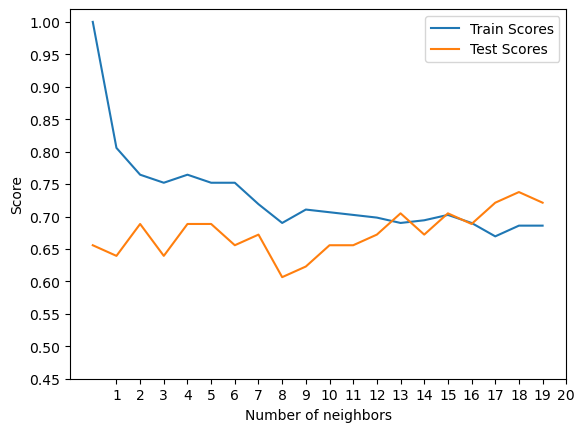

In [38]:
# PLotting train and test scores
df_knn_scores.plot()
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.xticks(np.arange(1, 21))
plt.yticks(np.arange(0.45, 1.01, 0.05));

#### 5.1.2. with RandomizedSearchCV

Since `LogisticRegression` and `RandomForestClassifier` have a better score, those will be tuned using `RandomizedSearchCV`.

In [39]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 30),
    'solver': ['liblinear']
}

# Create a hyperparameter grid for Random Forest Classifier
rfc_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

**Tune LogisticRegression**

In [40]:
np.random.seed(56)

# Setup RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               n_iter=20,
                               cv=5,
                               verbose=True)

# Fit the RandomizedSearchCV model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
# Check best hyperparameters with the highest score
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 2.592943797404667}

In [42]:
# Check the improved score
rs_log_reg.score(X_test, y_test)

0.819672131147541

**Tune RandomForestClassifier**

In [46]:
np.random.seed(56)

# Setup RandomizedSearchCV
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rfc_grid,
                            n_iter=20,
                            cv=5,
                            verbose=True)

# Fit the RandomizedSearchCV model
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
# Check best hyperparameters with the highest score
rs_rfc.best_params_

{'n_estimators': 510,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [48]:
# Check the improved score
rs_rfc.score(X_test, y_test)

0.8032786885245902

#### 5.1.3. with GridSearchCV

Since `LogisticRegression` has the best score, it will be improved again using `GridSearchCV`.

In [49]:
# Create a new hyperparameter grid for Logistic Regression
log_reg_grid_2 = {
    'C': np.logspace(-5, 5, 30),
    'solver': ['liblinear']
}

In [50]:
np.random.seed(12)

# Setup GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid_2,
                          cv=5,
                          verbose=True)

# Fit the GridSearchCV model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 2.21221629e-05, 4.89390092e-05, 1.08263673e-04,
       2.39502662e-04, 5.29831691e-04, 1.17210230e-03, 2.59294380e-03,
       5.73615251e-03, 1.26896100e-02, 2.80721620e-02, 6.21016942e-02,
       1.37382380e-01, 3.03919538e-01, 6.72335754e-01, 1.48735211e+00,
       3.29034456e+00, 7.27895384e+00, 1.61026203e+01, 3.56224789e+01,
       7.88046282e+01, 1.74332882e+02, 3.85662042e+02, 8.53167852e+02,
       1.88739182e+03, 4.17531894e+03, 9.23670857e+03, 2.04335972e+04,
       4.52035366e+04, 1.00000000e+05]),
                         'solver': ['liblinear']},
             verbose=True)

In [51]:
# Check the best hyperparameters with GridSearchCV
gs_log_reg.best_params_

{'C': 1.4873521072935119, 'solver': 'liblinear'}

In [52]:
# Check the GridSearchCV improved model
gs_log_reg.score(X_test, y_test)

0.8360655737704918

#### **Evaluating the improved model (Logistic Regression)**
The model that was improved (`LogisticRegression`) will be evaluated using cross-validation (if it is possible).
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Accuracy
* Precision
* Recall
* F1-score

For evaluations will be made some predictions and those predictions will be compared with the true label (y_test).

In [53]:
# Make predictions
y_preds = gs_log_reg.predict(X_test)

In [54]:
# Create a dataframe with the predictions and y_test to compare them
df_preds_comparison = pd.DataFrame({'Predicted label': y_preds,
                                    'True label': y_test})
df_preds_comparison

,Predicted label,True label
81,1,1
168,0,0
137,1,1
242,0,0
2,1,1
...,...,...
202,0,0
26,1,1
219,0,0
243,0,0


### **5.2. ROC curve and AUC score**

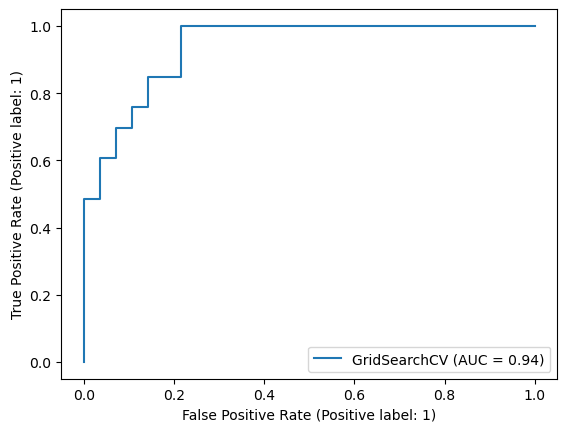

In [55]:
# PLot ROC curve and calculate AUC score with `.from_estimator()` function
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

### **5.3. Confusion Matrix**

There are two options to create a confusion matrix, using:
1. `confusion_matrix()` function
2. `ConfusionMatrixDisplay`

#### 5.3.1. Using `confusion_matrix()`

In [56]:
print(confusion_matrix(y_test, y_preds))

[[23  5]
 [ 5 28]]


For a better visualization, plot the confusion matrix using Seaborn library.

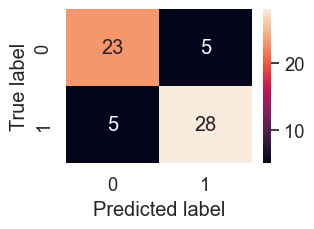

In [57]:
# Set font size
sns.set(font_scale=1.2)
 
def plot_conf_mat(y_test, y_preds):
    '''
    Plots the confusion matrix using Seaborn's heatmap().
    '''
    fig, ax = plt.subplots(figsize=(3, 2))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True)
    plt.xlabel('Predicted label') # X-axis has the predictions
    plt.ylabel('True label') # Y-axis has the true labels
    
plot_conf_mat(y_test, y_preds)

#### 5.3.2. Using `ConfusionMatrixDisplay`

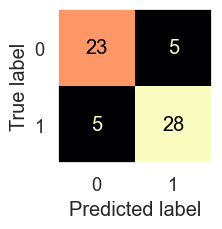

In [58]:
fix, ax = plt.subplots(figsize=(3, 2))
ax.grid(False) # eliminate the grid from each box

# PLot the confusion matrix with `.from_estimator()` function
ConfusionMatrixDisplay.from_estimator(gs_log_reg, X_test, y_test, 
                                      cmap='magma', colorbar=False, 
                                      ax=ax);

### **5.4. Evaluation Metrics**
Calculate evaluation metrics (accuracy, precision, recall and f1-score) of the model using cross-validation with `cross_val_score()` function.

To evaluate through cross-validation, a new `LogisticRegression` model will be instantiated, because cross-validation is going to split itself the data into train and test sets.

In [59]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 1.4873521072935119, 'solver': 'liblinear'}

In [60]:
# Create the new classifier with the best parameters
clf = LogisticRegression(C=1.4873521072935119, 
                         solver='liblinear')

#### 5.4.1. Classification Report

In [61]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



#### 5.4.2. Accuracy

In [62]:
cv_accuracy = cross_val_score(clf, X, y, 
                              cv=5, 
                              scoring='accuracy')
np.mean(cv_accuracy)

0.8215300546448088

#### 5.4.3. Precision

In [63]:
cv_precision = cross_val_score(clf, X, y, 
                               cv=5, 
                               scoring='precision')
np.mean(cv_precision)

0.817900063251107

#### 5.4.4. Recall

In [64]:
cv_recall = cross_val_score(clf, X, y, 
                            cv=5, 
                            scoring='recall')
np.mean(cv_recall)

0.8727272727272727

#### 5.4.5. F1 score

In [65]:
cv_f1 = cross_val_score(clf, X, y, 
                        cv=5, 
                        scoring='f1')
np.mean(cv_f1)

0.8431741323998502

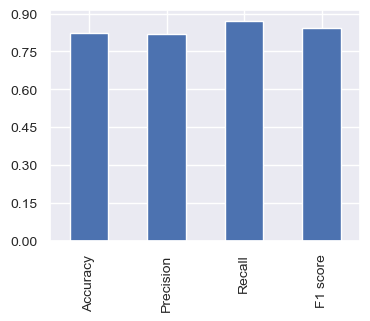

In [66]:
# Plot the cross-validation metrics using pd.DataFrame()
df_eval_metrics = pd.DataFrame({'Accuracy': np.mean(cv_accuracy),
                                'Precision': np.mean(cv_precision),
                                'Recall': np.mean(cv_recall),
                                'F1 score': np.mean(cv_f1)}, 
                               index=[0])

df_eval_metrics.T.plot.bar(figsize=(4, 3), 
                           legend=False,
                           yticks=np.arange(0, 1, 0.15),
                           fontsize=10,);

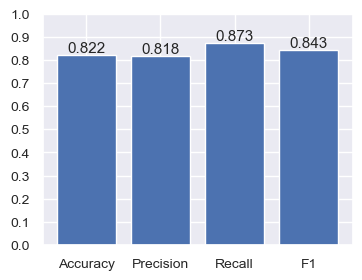

In [67]:
# Plot the cross-validation metrics using lists
eval_names = ['Accuracy', 'Precision', 'Recall', 'F1']
eval_scores = [np.mean(cv_accuracy), np.mean(cv_precision), np.mean(cv_recall), np.mean(cv_f1)]

fix, ax = plt.subplots(figsize=(4, 3))
eval_metrics = ax.bar(eval_names, eval_scores)

ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.tick_params(axis='both', labelsize=10)
ax.bar_label(eval_metrics, fmt='{:,.3f}', fontsize=11);

### **6. Feature Importance**
Represents which features contributed the most to the outputs of the model. Each model/algorithm has different feature importance.

For `LogisticRegression`, one of the feature importance is `coef_` parameter.

`coef_` = represents how much the independent variables contribute to the dependent variable (how it correlates to the target variable).

In [68]:
# First step is fitting an instance of the model
clf = LogisticRegression(C=1.4873521072935119, 
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=1.4873521072935119, solver='liblinear')

In [69]:
# Check coef_
clf.coef_

array([[ 0.00769809, -1.46719656,  0.70642572, -0.01909745, -0.00335729,
        -0.09557208,  0.26272759,  0.02721276, -1.05332938, -0.46430385,
         0.49939696, -0.6681427 , -0.50264663]])

In [70]:
# Pair each column to coef of each feature
feature_coef = dict(zip(df.columns, list(clf.coef_[0])))
feature_coef

{'age': 0.007698094712191574,
 'sex': -1.4671965614684732,
 'cp': 0.7064257150085893,
 'trestbps': -0.019097446269446927,
 'chol': -0.0033572903985336117,
 'fbs': -0.09557208012861709,
 'restecg': 0.2627275888278151,
 'thalach': 0.027212757132990505,
 'exang': -1.0533293821698708,
 'oldpeak': -0.4643038498971197,
 'slope': 0.4993969616209758,
 'ca': -0.668142696229154,
 'thal': -0.5026466254856252}

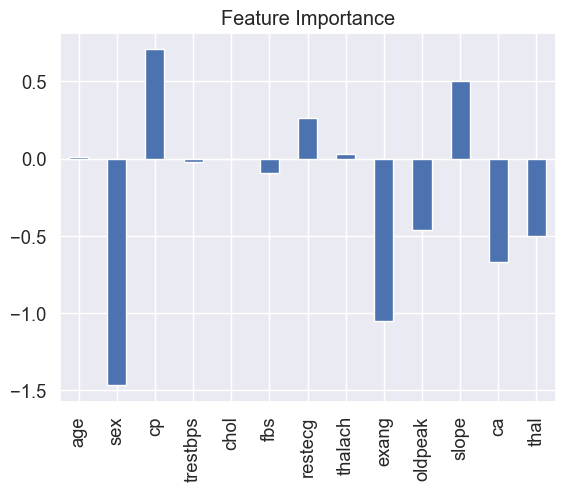

In [71]:
# Visualize feature importance
df_feature_coef = pd.DataFrame(feature_coef, index=[0])
df_feature_coef.T.plot.bar(title='Feature Importance', 
                           legend=False);

In [72]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [74]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


So, according to the coefficient plot:
* the `sex` feature contributes a lot to the target column, meaning that once the value on `sex` increases, the value on `target` decreases
* the values on `cp` feature and the values on `target` column increase simultaneously, having a high correlation with each other